In [2]:
 # Import OS for navigation and environment set up
import os
# Check current location, '/content' is the Colab virtual machine
os.getcwd()
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/kaggle'

In [3]:
!pip install kaggle


In [4]:
# Navigate into Drive where you want to store your Kaggle data
os.chdir('/content')
# Paste and run the copied API command, the data will download to the current directory
!kaggle datasets download -d deepshah16/song-lyrics-dataset
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

 55% 11.0M/19.9M [00:00<00:00, 40.3MB/s]
100% 19.9M/19.9M [00:00<00:00, 57.2MB/s]


['.config', 'drive', 'song-lyrics-dataset.zip', 'sample_data']

In [5]:
!unzip song-lyrics-dataset.zip

Archive:  song-lyrics-dataset.zip
  inflating: csv/ArianaGrande.csv    
  inflating: csv/BTS.csv             
  inflating: csv/Beyonce.csv         
  inflating: csv/BillieEilish.csv    
  inflating: csv/CardiB.csv          
  inflating: csv/CharliePuth.csv     
  inflating: csv/ColdPlay.csv        
  inflating: csv/Drake.csv           
  inflating: csv/DuaLipa.csv         
  inflating: csv/EdSheeran.csv       
  inflating: csv/Eminem.csv          
  inflating: csv/JustinBieber.csv    
  inflating: csv/KatyPerry.csv       
  inflating: csv/Khalid.csv          
  inflating: csv/LadyGaga.csv        
  inflating: csv/Maroon5.csv         
  inflating: csv/NickiMinaj.csv      
  inflating: csv/PostMalone.csv      
  inflating: csv/Rihanna.csv         
  inflating: csv/SelenaGomez.csv     
  inflating: csv/TaylorSwift.csv     
  inflating: json files/Lyrics_ArianaGrande.json  
  inflating: json files/Lyrics_BTS.json  
  inflating: json files/Lyrics_Beyonc.json  
  inflating: json files/Lyrics

In [81]:
import pandas as pd
data = pd.read_csv("csv/TaylorSwift.csv")

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  479 non-null    int64  
 1   Artist      479 non-null    object 
 2   Title       479 non-null    object 
 3   Album       408 non-null    object 
 4   Year        337 non-null    float64
 5   Date        337 non-null    object 
 6   Lyric       477 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 26.3+ KB


In [83]:
data.describe()

,Unnamed: 0,Year
count,479.000000,337.000000
mean,239.000000,2014.148368
std,138.419652,4.960733
min,0.000000,2000.000000
25%,119.500000,2010.000000
50%,239.000000,2014.000000
75%,358.500000,2019.000000
max,478.000000,2021.000000


In [84]:
data.shape

(479, 7)

In [85]:
data.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


In [86]:
data.Lyric[0]

"vintage tee brand new phone high heels on cobblestones when you are young they assume you know\u2005nothing sequin\u2005smile black lipstick sensual\u2005politics when you are young they assume\u2005you know nothing   but i knew you dancin' in your levi's drunk under a streetlight i i knew you hand under my sweatshirt baby kiss it better i  refrain and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite   a friend to all is a friend to none chase two girls lose the one when you are young they assume you know nothing   but i knew you playing hideandseek and giving me your weekends i i knew you your heartbeat on the high line once in twenty lifetimes i  refrain and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite   to kiss in cars and downtown bars was all we needed you drew stars around my scars but now i'm bleedin'   'cause i knew you steppin' on the last train marked me like a blood

In [87]:
data.isnull().sum()

Unnamed: 0      0
Artist          0
Title           0
Album          71
Year          142
Date          142
Lyric           2
dtype: int64

In [88]:
data[data.Lyric.isnull()]

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
140,140,Taylor Swift,Reputation Magazine Vol. 1,reputation,2017.0,2017-11-10,NaN
395,395,Taylor Swift,Formula 1 Grand Prix Concert Outfit,Taylor Swift,2016.0,2016-10-22,NaN


In [89]:
data = data.dropna(subset=["Lyric"])

In [90]:
data = data.iloc[:,1:]

In [91]:
data.shape

(477, 6)

In [92]:
data.head()

,Artist,Title,Album,Year,Date,Lyric
0,Taylor Swift,​cardigan,folklore,2020.0,2020-07-24,vintage tee brand new phone high heels on cobb...
1,Taylor Swift,​exile,folklore,2020.0,2020-07-24,justin vernon i can see you standing honey wit...
2,Taylor Swift,Lover,Lover,2019.0,2019-08-16,we could leave the christmas lights up 'til ja...
3,Taylor Swift,​the 1,folklore,2020.0,2020-07-24,i'm doing good i'm on some new shit been sayin...
4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,2017-08-25,i don't like your little games don't like your...


In [93]:
data.drop('Date',axis = 1,inplace=True)

In [94]:
data["Album"] = data["Album"].fillna("Unnamed")

In [95]:
data.head()

,Artist,Title,Album,Year,Lyric
0,Taylor Swift,​cardigan,folklore,2020.0,vintage tee brand new phone high heels on cobb...
1,Taylor Swift,​exile,folklore,2020.0,justin vernon i can see you standing honey wit...
2,Taylor Swift,Lover,Lover,2019.0,we could leave the christmas lights up 'til ja...
3,Taylor Swift,​the 1,folklore,2020.0,i'm doing good i'm on some new shit been sayin...
4,Taylor Swift,Look What You Made Me Do,reputation,2017.0,i don't like your little games don't like your...


In [96]:
data["Year"] = data["Year"].fillna("2000")

In [97]:
data.head()

,Artist,Title,Album,Year,Lyric
0,Taylor Swift,​cardigan,folklore,2020,vintage tee brand new phone high heels on cobb...
1,Taylor Swift,​exile,folklore,2020,justin vernon i can see you standing honey wit...
2,Taylor Swift,Lover,Lover,2019,we could leave the christmas lights up 'til ja...
3,Taylor Swift,​the 1,folklore,2020,i'm doing good i'm on some new shit been sayin...
4,Taylor Swift,Look What You Made Me Do,reputation,2017,i don't like your little games don't like your...


In [98]:
data.isnull().sum()

Artist    0
Title     0
Album     0
Year      0
Lyric     0
dtype: int64

In [99]:
lyrics = data["Lyric"]
lyrics

0      vintage tee brand new phone high heels on cobb...
1      justin vernon i can see you standing honey wit...
2      we could leave the christmas lights up 'til ja...
3      i'm doing good i'm on some new shit been sayin...
4      i don't like your little games don't like your...
                             ...                        
474    drew looks at me i fake a smile so he won't se...
475    to put it plainly we just couldnt stop writing...
476    turn wycd on you're on your grunwald back from...
477    zwrotka  siedzę i patrzę jak czytasz z głową p...
478    trying just like they say just taking the step...
Name: Lyric, Length: 477, dtype: object

In [100]:
import re
i=0
for lyric in lyrics:
    lyric = re.sub("\s+", " ", lyric,flags=re.UNICODE)
    # lyric = re.sub("\u2005", "\n", lyric,flags=re.UNICODE)
    data.Lyric[i] = lyric
    i+=1

In [101]:
data.Lyric

0      vintage tee brand new phone high heels on cobb...
1      justin vernon i can see you standing honey wit...
2      we could leave the christmas lights up 'til ja...
3      i'm doing good i'm on some new shit been sayin...
4      i don't like your little games don't like your...
                             ...                        
474    turn wycd on you're on your grunwald back from...
475    zwrotka siedzę i patrzę jak czytasz z głową po...
476    trying just like they say just taking the step...
477    zwrotka  siedzę i patrzę jak czytasz z głową p...
478    trying just like they say just taking the step...
Name: Lyric, Length: 477, dtype: object

In [105]:
a = []
for l in data.Lyric:
  a.append(l)
print(a)

["vintage tee brand new phone high heels on cobblestones when you are young they assume you know nothing sequin smile black lipstick sensual politics when you are young they assume you know nothing but i knew you dancin' in your levi's drunk under a streetlight i i knew you hand under my sweatshirt baby kiss it better i refrain and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite a friend to all is a friend to none chase two girls lose the one when you are young they assume you know nothing but i knew you playing hideandseek and giving me your weekends i i knew you your heartbeat on the high line once in twenty lifetimes i refrain and when i felt like i was an old cardigan under someone's bed you put me on and said i was your favorite to kiss in cars and downtown bars was all we needed you drew stars around my scars but now i'm bleedin' 'cause i knew you steppin' on the last train marked me like a bloodstain i i knew you tried to cha

In [107]:
file = open("song.txt", "w")
for i in a:
  file.write(i)
file.close

<function TextIOWrapper.close>

In [102]:
a = data.Lyric[0]

In [103]:
data.head()

,Artist,Title,Album,Year,Lyric
0,Taylor Swift,​cardigan,folklore,2020,vintage tee brand new phone high heels on cobb...
1,Taylor Swift,​exile,folklore,2020,justin vernon i can see you standing honey wit...
2,Taylor Swift,Lover,Lover,2019,we could leave the christmas lights up 'til ja...
3,Taylor Swift,​the 1,folklore,2020,i'm doing good i'm on some new shit been sayin...
4,Taylor Swift,Look What You Made Me Do,reputation,2017,i don't like your little games don't like your...


In [104]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [81]:
# lyrics = data["Lyric"]
# i=0
# for lyric in lyrics:
#   data.Lyric[i] = nltk.word_tokenize(lyric)
#   i+=1

In [82]:
data.head()

,Artist,Title,Album,Year,Lyric
0,Taylor Swift,​cardigan,folklore,2020,"[vintage, tee, brand, new, phone, high, heels,..."
1,Taylor Swift,​exile,folklore,2020,"[justin, vernon, i, can, see, you, standing, h..."
2,Taylor Swift,Lover,Lover,2019,"[we, could, leave, the, christmas, lights, up,..."
3,Taylor Swift,​the 1,folklore,2020,"[i, 'm, doing, good, i, 'm, on, some, new, shi..."
4,Taylor Swift,Look What You Made Me Do,reputation,2017,"[i, do, n't, like, your, little, games, do, n'..."


In [95]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt


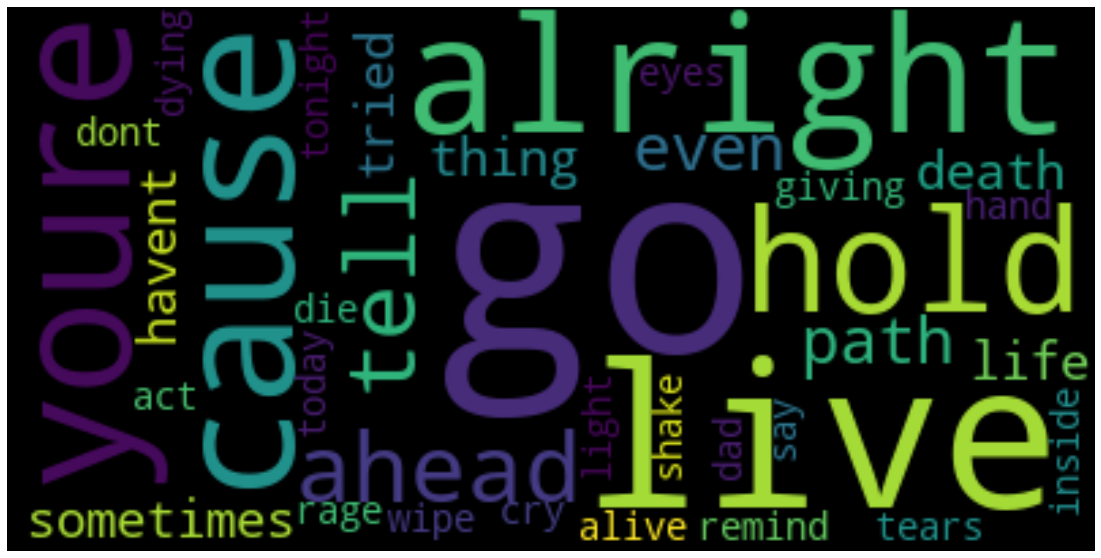

In [114]:
song_lyrics = "its alright to cry even my dad does sometimes  so dont wipe your eyes  tears remind you youre alive  its alright to die cause death the only thing you havent tried  but just for tonight hold on  so live life like youre giving all  cause you act like you are  go ahead and just live it up  go on and tell me your path    its alright to shake  even my hand does sometimes  so inside the rage against the dying of the light  its alright to say that deaths  the only thing you havent tried  but just for today hold on  so live life like youre giving all  cause you act like you are  go ahead and just live it up  go on and tell me your path    go ahead and just live it up  go on and tell me your path and hold on"
# create mask array of heart shape


# draw wordcloud
wc = WordCloud(max_words=1000,
            background_color='black',            
            max_font_size=100,
            relative_scaling=0)

wc.generate(song_lyrics)
plt.figure(figsize=(20, 10))
plt.axis('off')
plt.imshow(wc, interpolation="bilinear")

In [115]:
input_len =len(song_lyrics)
input_len

709

In [116]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

In [117]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()

def get_sequence_of_tokens(corpus):
    ## tokenization
    tokenizer.fit_on_texts(corpus)
    total_words = len(tokenizer.word_index) + 1
    
    ## convert data to sequence of tokens 
    input_sequences = []
    for line in corpus:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)
    return input_sequences, total_words

In [118]:
inp_sequences, total_words = get_sequence_of_tokens(song_lyrics)

In [119]:
inp_sequences

[]

In [106]:
total_words = input_len = len(song_lyrics) - 1
model = Sequential()

# Add Input Embedding Layer
model.add(Embedding(total_words, 10, input_length=input_len))

# Add Hidden Layer 1 - LSTM Layer
model.add(LSTM(100))

# Add Output Layer
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [107]:
model.fit(song_lyrics, epochs=10, verbose=2)

IndexError: ignored